<a href="https://colab.research.google.com/github/Gayathri288/231801039_PODS/blob/main/ex_6a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import matplotlib.ticker as mtick

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [2]:
file_path = "netflix_titles.xlsx"
df = pd.read_excel(file_path)

In [3]:
print("Rows, columns:", df.shape)
display(df.head())

Rows, columns: (6236, 9)


,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [5]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [6]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')


In [7]:
def parse_minutes(x):
    if pd.isna(x):
        return np.nan
    # Keep digits
    s = re.sub(r'[^\d]', '', str(x))
    return float(s) if s != "" else np.nan

df['duration_minutes_num'] = df['duration_minutes'].apply(parse_minutes)

In [8]:
def parse_seasons(x):
    if pd.isna(x):
        return np.nan
    s = re.sub(r'[^\d]', '', str(x))
    return int(s) if s != "" else np.nan

df['duration_seasons_num'] = df['duration_seasons'].apply(parse_seasons)

print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
duration_minutes        1969
duration_seasons        4265
type                       1
title                      1
date_added                14
release_year               2
rating                    13
description                3
show_id                    4
year_added                14
month_added               14
duration_minutes_num    1971
duration_seasons_num    4265
dtype: int64


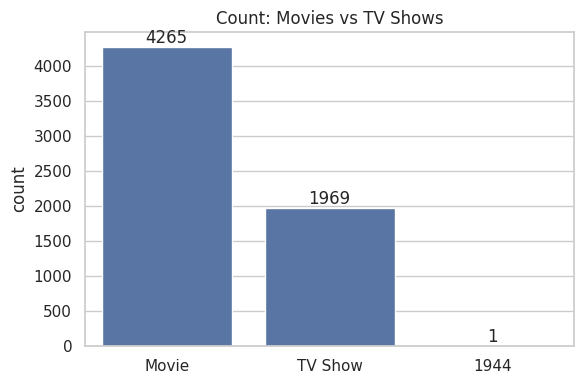

Counts by type:
type
Movie      4265
TV Show    1969
1944          1
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(6,4))
order = df['type'].value_counts().index
sns.countplot(x='type', data=df, order=order)
plt.title("Count: Movies vs TV Shows")
plt.xlabel("")
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2, p.get_height()),
                       ha='center', va='bottom')
plt.tight_layout()
plt.show()

print("Counts by type:")
print(df['type'].value_counts())

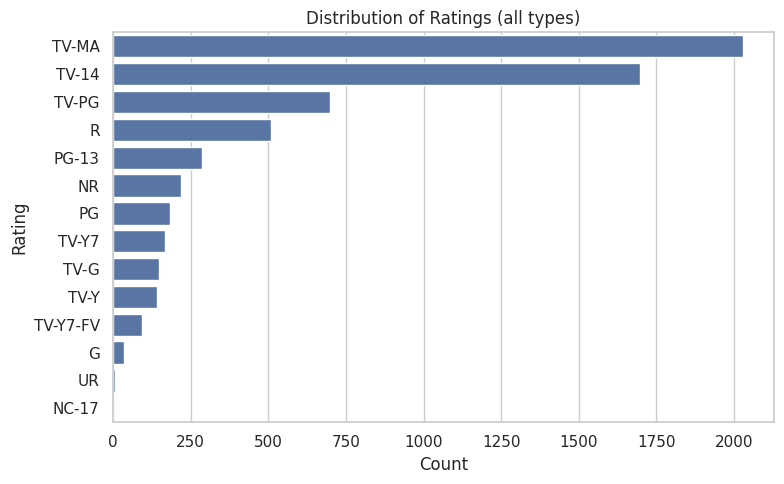

In [10]:
plt.figure(figsize=(8,5))
rating_order = df['rating'].value_counts().index
sns.countplot(y='rating', data=df, order=rating_order)
plt.title("Distribution of Ratings (all types)")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

In [11]:
if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    plt.figure(figsize=(8,5)); sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title("Top Countries by Content Count")
    plt.tight_layout(); plt.show()
else:
    print("\nCountry information not present in dataset — skipping (question 3.c).")



Country information not present in dataset — skipping (question 3.c).


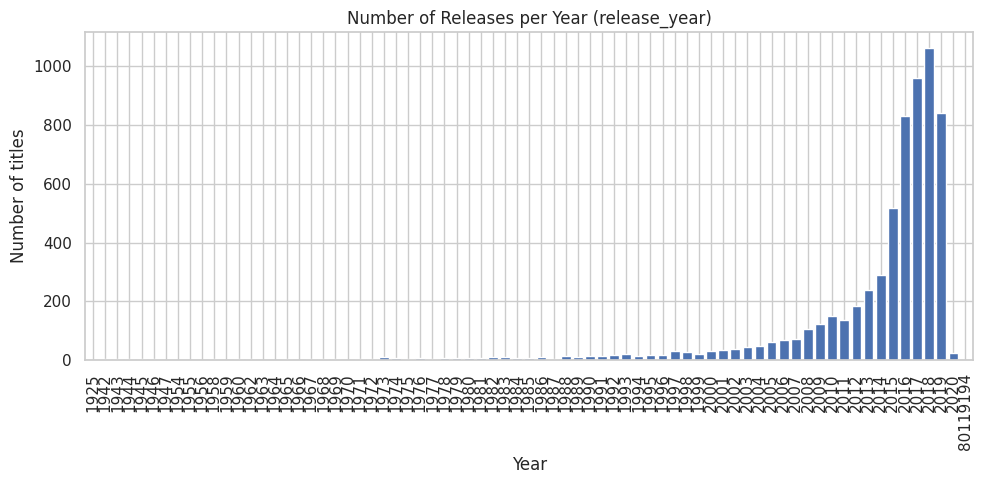

In [12]:
plt.figure(figsize=(10,5))
release_counts = df['release_year'].value_counts().sort_index()
release_counts.plot(kind='bar', width=0.8)
plt.title("Number of Releases per Year (release_year)")
plt.xlabel("Year")
plt.ylabel("Number of titles")
plt.tight_layout()
plt.show()


In [13]:
top_release_years = release_counts.sort_values(ascending=False).head(10)
print("\nTop years by number of releases (release_year):")
print(top_release_years)


Top years by number of releases (release_year):
release_year
2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
Name: count, dtype: Int64


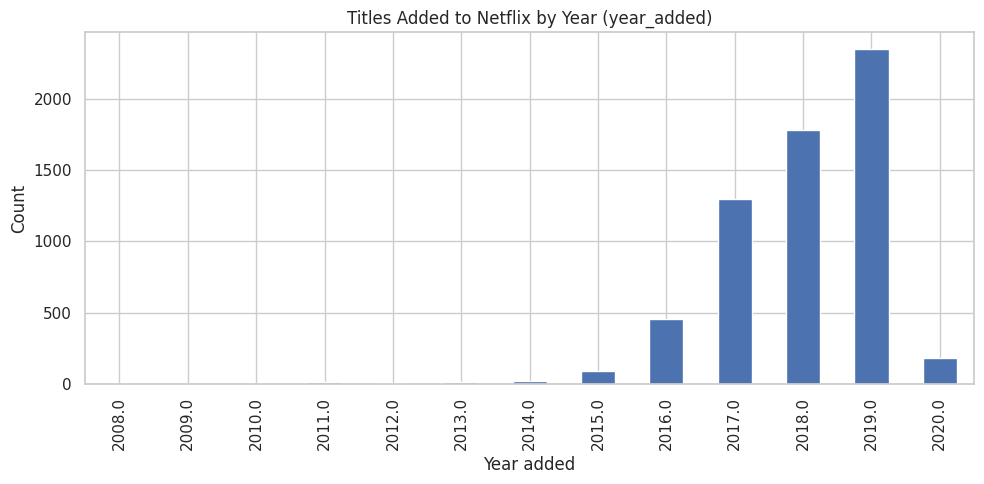


Titles added per year (sample):


,count
year_added,
2011.0,13
2012.0,7
2013.0,12
2014.0,25
2015.0,90
2016.0,456
2017.0,1299
2018.0,1782
2019.0,2349


In [15]:
plt.figure(figsize=(10,5))
added_counts = df['year_added'].value_counts().sort_index()
added_counts.plot(kind='bar')
plt.title("Titles Added to Netflix by Year (year_added)")
plt.xlabel("Year added")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("\nTitles added per year (sample):")
display(added_counts.tail(10))

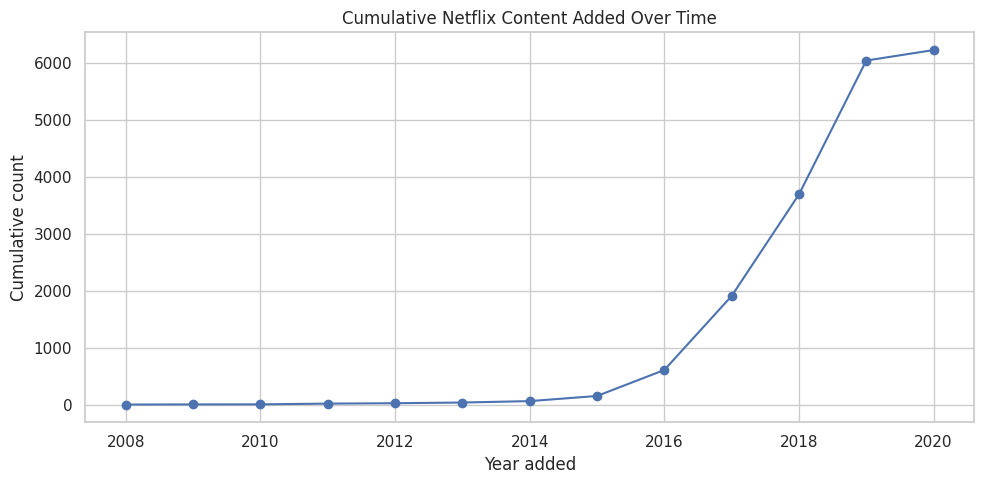

In [16]:
plt.figure(figsize=(10,5))
added_yearly = df.groupby('year_added').size().sort_index()
added_yearly.cumsum().plot(marker='o')
plt.title("Cumulative Netflix Content Added Over Time")
plt.xlabel("Year added")
plt.ylabel("Cumulative count")
plt.tight_layout()
plt.show()

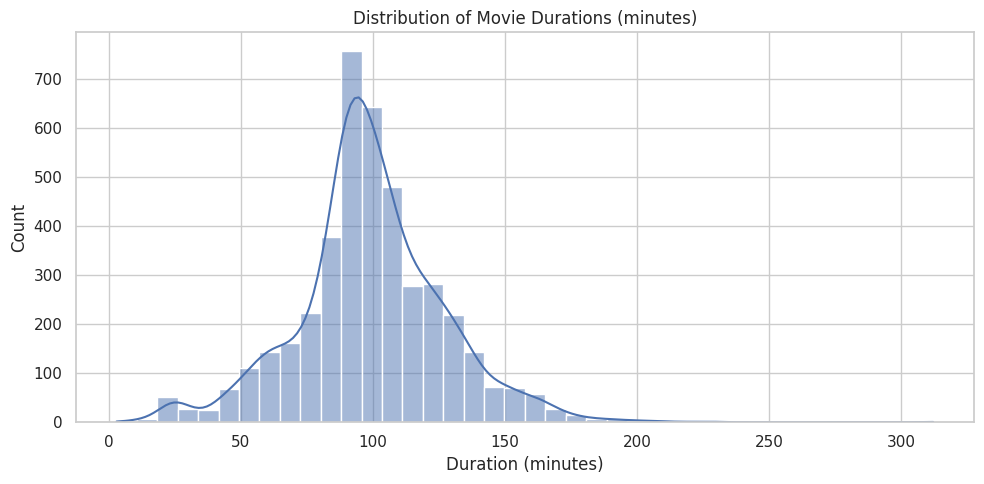

Movie durations: mean = 99.1 median = 98.0


In [17]:
movies = df[df['type'].str.lower() == 'movie']
if movies.shape[0] > 0:
    plt.figure(figsize=(10,5))
    sns.histplot(movies['duration_minutes_num'].dropna(), bins=40, kde=True)
    plt.title("Distribution of Movie Durations (minutes)")
    plt.xlabel("Duration (minutes)")
    plt.tight_layout()
    plt.show()
    print("Movie durations: mean =", round(movies['duration_minutes_num'].mean(),1),
          "median =", round(movies['duration_minutes_num'].median(),1))
else:
    print("No 'Movie' rows found or 'type' column inconsistent; check values in df['type'].")


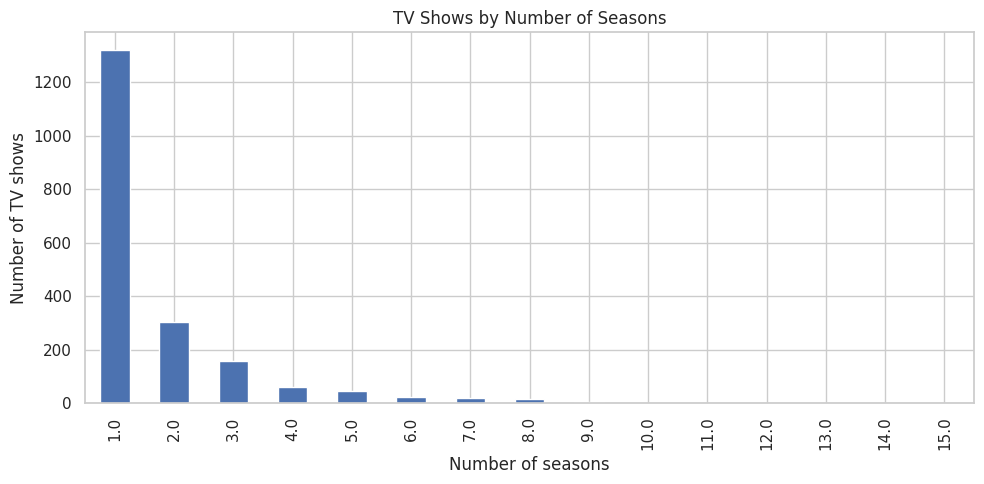


Top few season counts (TV shows):
duration_seasons_num
1.0     1321
2.0      304
3.0      158
4.0       61
5.0       46
6.0       22
7.0       21
8.0       16
9.0        7
10.0       3
11.0       3
12.0       2
13.0       2
14.0       1
15.0       2
Name: count, dtype: int64


In [18]:
tv = df[df['type'].str.lower() == 'tv show']
if tv.shape[0] > 0:
    season_counts = tv['duration_seasons_num'].value_counts().sort_index()
    plt.figure(figsize=(10,5))
    season_counts.plot(kind='bar')
    plt.title("TV Shows by Number of Seasons")
    plt.xlabel("Number of seasons")
    plt.ylabel("Number of TV shows")
    plt.tight_layout()
    plt.show()
    print("\nTop few season counts (TV shows):")
    print(season_counts.head(20))
else:
    print("No 'TV Show' rows found or 'type' column inconsistent.")

In [19]:
missing_for_genres = [c for c in ['listed_in','cast','director'] if c not in df.columns]
if missing_for_genres:
    print("\nNOTE: Missing columns for genre/director/actors:", missing_for_genres)
    print("Skipping genre/director/actor analysis because the dataset does not contain these columns.")



NOTE: Missing columns for genre/director/actors: ['listed_in', 'cast', 'director']
Skipping genre/director/actor analysis because the dataset does not contain these columns.


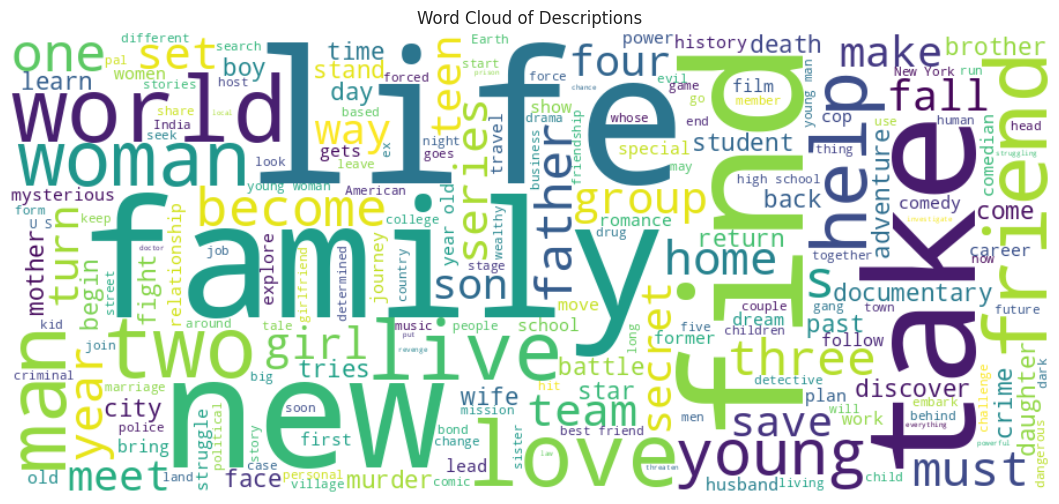

In [20]:
text = " ".join(df['description'].dropna().astype(str).values)
if len(text.strip()) > 0:
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=900, height=400, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(14,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Descriptions")
    plt.show()
else:
    print("No descriptions available to generate word cloud.")


In [21]:
from collections import Counter
words = re.findall(r'\b\w+\b', text.lower())
# remove very short words and some stopwords
words = [w for w in words if len(w) > 3 and w not in stopwords]
common_words = Counter(words).most_common(30)
print("\nMost common words in descriptions (top 30):")
display(pd.DataFrame(common_words, columns=['word','count']).head(30))


Most common words in descriptions (top 30):


,word,count
0,life,599
1,young,511
2,family,418
3,world,404
4,love,341
5,woman,331
6,friends,303
7,series,288
8,documentary,261
9,must,246


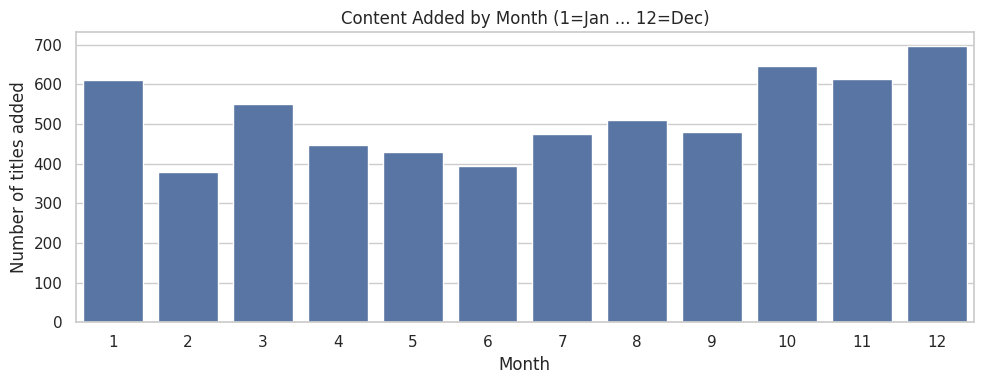


Month counts (1=Jan):


,count
month_added,
1,610
2,378
3,550
4,447
5,428
6,393
7,474
8,509
9,479


In [22]:
month_order = range(1,13)
month_counts = df['month_added'].value_counts().reindex(month_order).fillna(0)
plt.figure(figsize=(10,4))
sns.barplot(x=list(month_order), y=month_counts.values)
plt.title("Content Added by Month (1=Jan ... 12=Dec)")
plt.xlabel("Month")
plt.ylabel("Number of titles added")
plt.tight_layout()
plt.show()

print("\nMonth counts (1=Jan):")
display(month_counts.astype(int))


In [23]:
if 'country' not in df.columns:
    print("\nQuestion 9 (Country wise Movies vs TV Shows) cannot be answered: 'country' column missing.")


Question 9 (Country wise Movies vs TV Shows) cannot be answered: 'country' column missing.


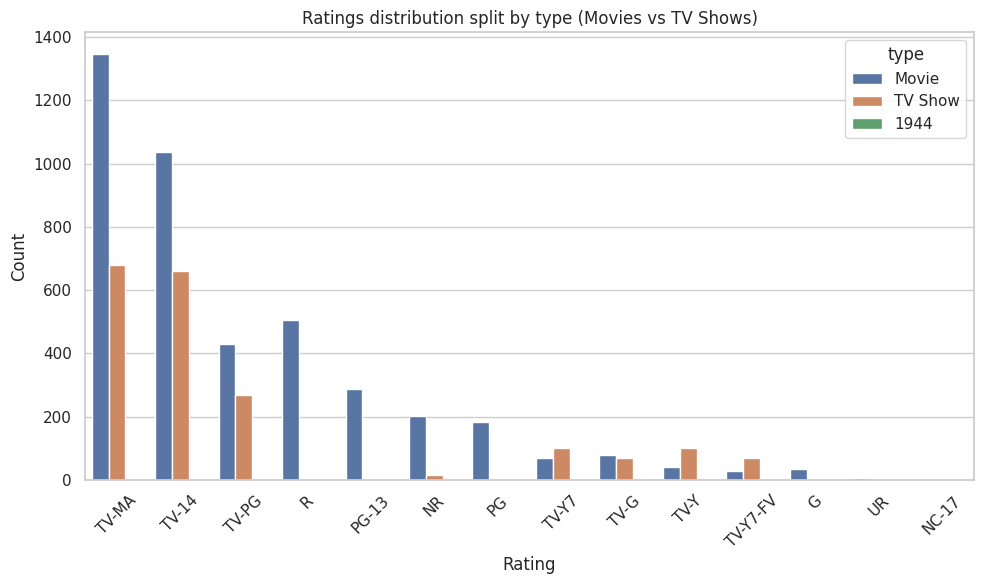


Top ratings overall:
rating
TV-MA       2027
TV-14       1698
TV-PG        700
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: count, dtype: int64


In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', hue='type', data=df, order=df['rating'].value_counts().index)
plt.title("Ratings distribution split by type (Movies vs TV Shows)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print top ratings
print("\nTop ratings overall:")
print(df['rating'].value_counts().head(20))

In [25]:
if df['release_year'].notna().any():
    oldest_year = df['release_year'].min()
    newest_year = df['release_year'].max()
    print(f"\nOldest release year in dataset: {oldest_year}")
    print("Example title(s) from oldest year:")
    display(df[df['release_year'] == oldest_year][['title','type','release_year']].head())

    print(f"\nNewest release year in dataset: {newest_year}")
    print("Example title(s) from newest year:")
    display(df[df['release_year'] == newest_year][['title','type','release_year']].head())
else:
    print("No valid release_year data available.")


Oldest release year in dataset: 1925
Example title(s) from oldest year:


,title,type,release_year
4293,Pioneers: First Women Filmmakers*,TV Show,1925



Newest release year in dataset: 80119194
Example title(s) from newest year:


,title,type,release_year
2018,TV-PG,1944,80119194


In [26]:

if 'listed_in' in df.columns:
    pass
else:
    print("\nQuestion 12 (Genre co-occurrence heatmap) cannot be answered: 'listed_in' or genre column missing.")

print("\n--- Summary for your report ---")
print("Answered questions: 3a, 3b, 4a, 4b, 4c, 5a, 5b, 7, 8, 10, 11.")
print("Skipped due to missing columns: 3c (country), 6 (genre/director/actors), 9 (country), 12 (genre co-occurrence).")
print("If you want those analyses, provide a dataset that contains columns: 'country','listed_in','cast','director'.")



Question 12 (Genre co-occurrence heatmap) cannot be answered: 'listed_in' or genre column missing.

--- Summary for your report ---
Answered questions: 3a, 3b, 4a, 4b, 4c, 5a, 5b, 7, 8, 10, 11.
Skipped due to missing columns: 3c (country), 6 (genre/director/actors), 9 (country), 12 (genre co-occurrence).
If you want those analyses, provide a dataset that contains columns: 'country','listed_in','cast','director'.
